### **1/ Get Data**

In [1]:
import requests # Thư viện giúp gửi yêu cầu HTTP để tải file từ internet
import zipfile # Thư viện giúp làm việc với file .zip, bao gồm việc giải nén
from pathlib import Path # Hỗ trợ làm việc với đường dẫn file và thư mục một cách dễ dàng

# Setup path to data folder
data_path = Path("data/") # Định nghĩa một đối tượng Path trỏ đến thư mục data/. Đây là nơi sẽ lưu trữ dữ liệu tải về
image_path = data_path / "pizza_steak_sushi" # Định nghĩa image_path trỏ đến thư mục con pizza_steak_sushi bên trong data/

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    # parents=True: Nếu các thư mục cha (ví dụ: data/) chưa tồn tại, nó sẽ được tạo luôn.
    # exist_ok=True: Nếu thư mục đã tồn tại, không báo lỗi.
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # Tải file zip từ url
        print("Downloading pizza, steak, sushi data...")
        # request.content chứa toàn bộ nội dung của file zip tải về.
        # Ghi nội dung này vào file pizza_steak_sushi.zip.
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [2]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'Dirpath:{dirpath}')
    print(f'Dirnames:{dirnames}')
    print(f'Filenames:{filenames}')
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    print('-'*30)

In [3]:
walk_through_dir(image_path)

Dirpath:data/pizza_steak_sushi
Dirnames:['train', 'test']
Filenames:[]
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
------------------------------
Dirpath:data/pizza_steak_sushi/train
Dirnames:['sushi', 'pizza', 'steak']
Filenames:[]
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
------------------------------
Dirpath:data/pizza_steak_sushi/train/sushi
Dirnames:[]
Filenames:['307738.jpg', '1214108.jpg', '3737197.jpg', '390178.jpg', '17704.jpg', '2813454.jpg', '3353428.jpg', '170385.jpg', '2674024.jpg', '121940.jpg', '14046.jpg', '855721.jpg', '2492146.jpg', '1571146.jpg', '1551817.jpg', '1280119.jpg', '2871052.jpg', '3426958.jpg', '2590819.jpg', '169392.jpg', '1615453.jpg', '497686.jpg', '2021381.jpg', '1138695.jpg', '2175561.jpg', '93139.jpg', '840444.jpg', '773725.jpg', '542188.jpg', '700405.jpg', '2017378.jpg', '268990.jpg', '385154.jpg', '2797464.jpg', '2021685.jpg', '3004029.jpg', '2641778.jpg', '3081701.jpg', '3579071.jpg', '748830.jp

In [4]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir, image_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi'))

Random image path: data/pizza_steak_sushi/train/pizza/2760984.jpg
Image class: pizza
Image height: 512
Image width: 512


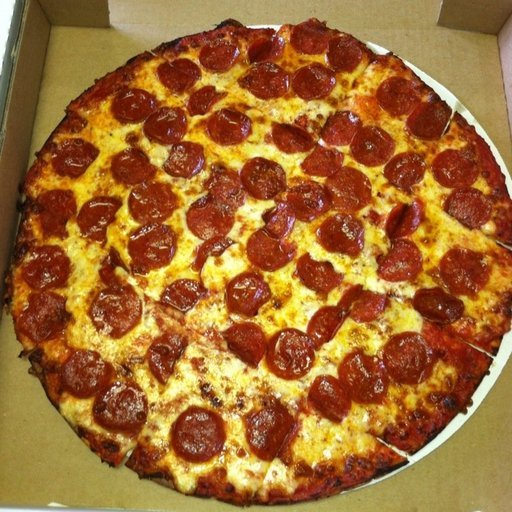

In [5]:
# Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
# Pick a random image path using Python's random.choice().
# Get the image class name using pathlib.Path.parent.stem.
# And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library).
# We'll then show the image and print some metadata.

import random
from PIL import Image

# Set seed
random.seed(100)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg")) # glob() -> Tìm các file thỏa dir được truyền vào

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
image = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {image.height}")
print(f"Image width: {image.width}")
image

##### **Metadata**
Metadata là dữ liệu mô tả dữ liệu. Nó cung cấp thông tin về một tệp, tài liệu, hình ảnh, video, hoặc bất kỳ loại dữ liệu nào mà nó liên quan.

📂 **File trên máy tính**: Mỗi tệp trên máy tính đều có metadata, ví dụ:

    Tên file (example.jpg)
    Kích thước (2.5 MB)
    Loại file (JPEG image)
    Ngày tạo (2025-02-24 10:30:00)
    Ngày chỉnh sửa cuối cùng (2025-02-24 11:00:00)

📸 **Hình ảnh**: Ảnh kỹ thuật số chứa metadata gọi là EXIF (Exchangeable Image File Format):

    Độ phân giải (1920x1080)
    Thiết bị chụp (Canon EOS 5D Mark IV)
    Thời gian chụp (2024-09-10 15:45:00)
    Vị trí GPS (37.7749° N, 122.4194° W)

ResolutionUnit: 2
ExifOffset: 180
Make: Apple
Model: iPhone 4
Software: 6.0.1
DateTime: 2012:11:21 17:09:13
YCbCrPositioning: 1
XResolution: 72.0
YResolution: 72.0
ExifVersion: b'0221'
ComponentsConfiguration: b'\x00\x00\x00\x01'
ShutterSpeedValue: 3.9068906605922553
DateTimeOriginal: 2012:11:21 17:09:13
DateTimeDigitized: 2012:11:21 17:09:13
ApertureValue: 2.970853573907009
BrightnessValue: 2.8823392357875117
MeteringMode: 5
FlashPixVersion: b'0100'
Flash: 9
FocalLength: 3.85
ColorSpace: 1
ExifImageWidth: 800
FocalLengthIn35mmFilm: 35
SceneCaptureType: 0
ExifImageHeight: 800
SubjectLocation: (1295, 967, 699, 696)
SensingMethod: 2
ExposureTime: 0.06666666666666667
FNumber: 2.8
ExposureProgram: 2
ISOSpeedRatings: 80
ExposureMode: 0
WhiteBalance: 0


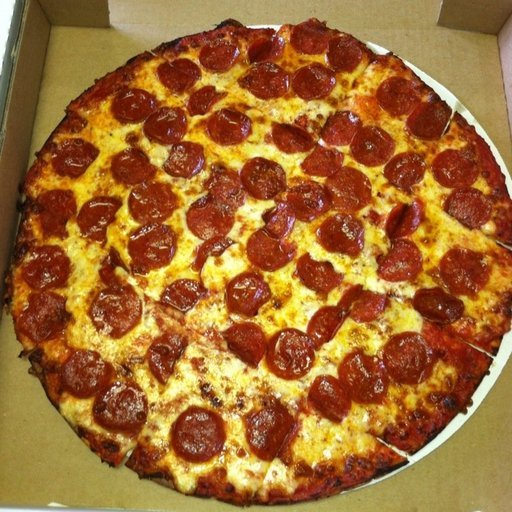

In [6]:
from PIL.ExifTags import TAGS

exif_data = image._getexif()

if exif_data:
    for tag, value in exif_data.items():
        tag_name = TAGS.get(tag, tag)
        print(f"{tag_name}: {value}")
image

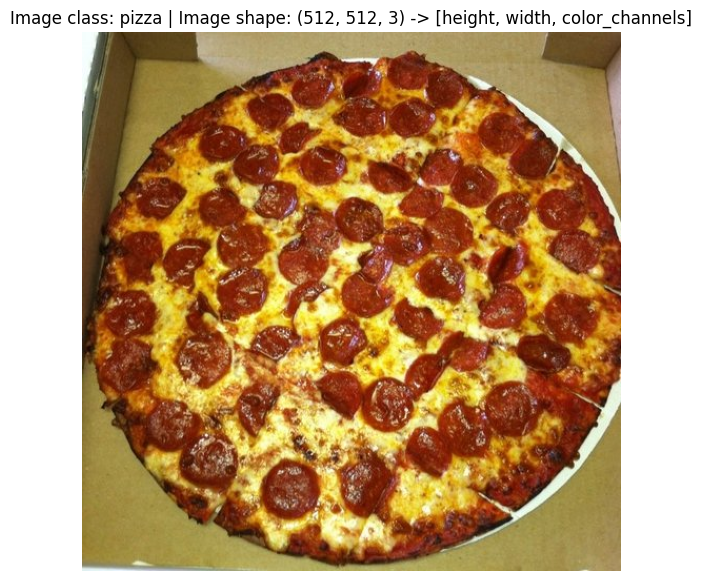

In [7]:
# Visualize by matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Turn image into numpy array
image_to_array = np.asarray(image)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(image_to_array)
plt.title(f"Image class: {image_class} | Image shape: {image_to_array.shape} -> [height, width, color_channels]")
plt.axis(False);

### **2/ Transform Data**

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cpu'

In [9]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

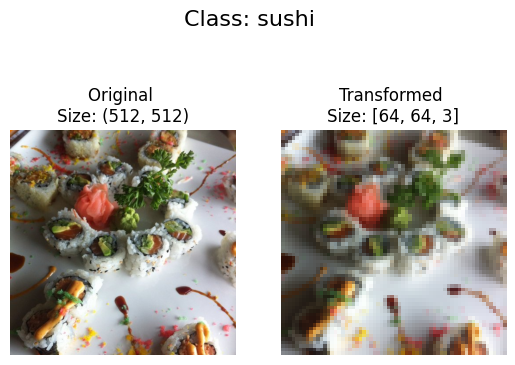

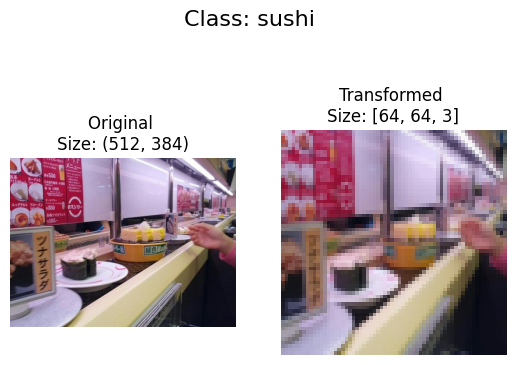

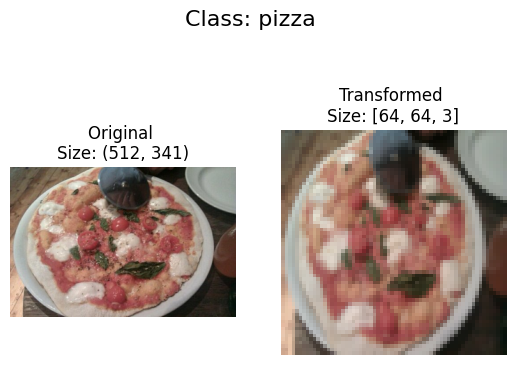

In [10]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {list(transformed_image.shape)}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### **3/ Loading Image Data Using `ImageFolder`**

In [11]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
dir(train_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_format_transform_repr',
 '_is_protocol',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'extensions',
 'extra_repr',
 'find_classes',
 'imgs',
 'loader',
 'make_dataset',
 'root',
 'samples',
 'target_transform',
 'targets',
 'transform',
 'transforms']

In [13]:
# Get class names as a list
class_names = train_data.classes

# Get class names as a dict
class_dict = train_data.class_to_idx

print(f'Class names: {class_names}')
print(f'Class dict: {class_dict}')

Class names: ['pizza', 'steak', 'sushi']
Class dict: {'pizza': 0, 'steak': 1, 'sushi': 2}


In [14]:
# Check the lengths
print(f'Length of train data: {len(train_data)}')
print(f'Length of test data: {len(test_data)}')

Length of train data: 225
Length of test data: 75


In [15]:
# Get first sample
img, label = train_data[0]
print(f'Image shape: {img.shape} -> [color_channels, height, width]')
print(f"Image datatype: {img.dtype}")
print(f'Label: {label}')
print(f"Label datatype: {type(label)}")
print(f'Image data:{img}')

Image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image datatype: torch.float32
Label: 0
Label datatype: <class 'int'>
Image data:tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  .

How about we plot a single image tensor using matplotlib?

We'll first have to to permute (rearrange the order of its dimensions) so it's compatible.

Right now our image dimensions are in the format CHW (color channels, height, width) but matplotlib prefers HWC (height, width, color channels).

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


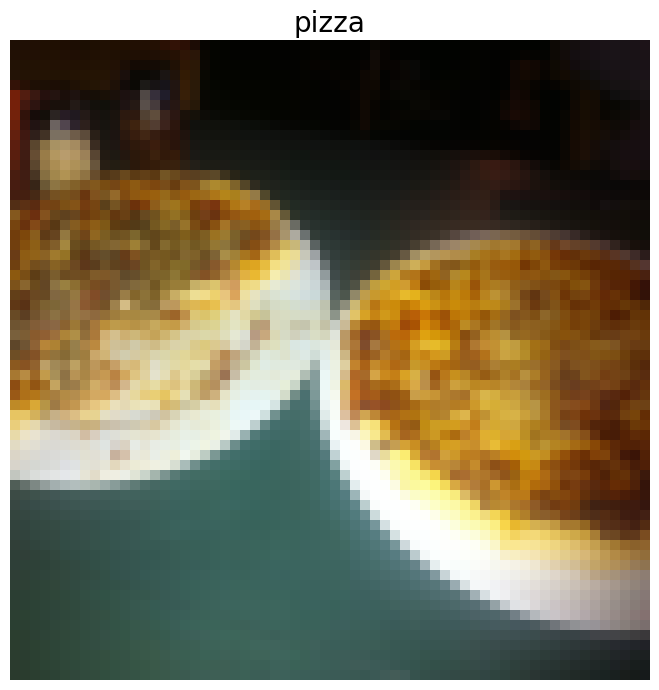

In [16]:
# Permute image from [C, H, W] to [H, W, C]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=20)
plt.tight_layout()
plt.show()

Notice the image is now more pixelated (less quality).

This is due to it being resized from 512x512 to 64x64 pixels.

The intuition here is that if you think the image is harder to recognize what's going on, chances are a model will find it harder to understand too.

##### **Ways Resize Image**

|Cách dùng| Công dụng|
|---------|----------|
|1/ Resize((H, W))|	Resize về đúng (H, W), có thể làm méo ảnh|
|2/ Resize(size) (size là số)|	Resize theo cạnh ngắn nhất, giữ tỷ lệ gốc|
|3/ Resize(size, interpolation=...)|	Chọn phương pháp nội suy|

Image original shape:(512, 512)
Image resize shape:(224, 224)


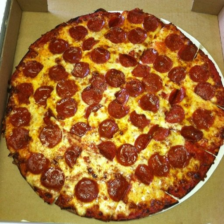

In [17]:
# Resize((H, W)) -> Trả về kích thước cố định
# Kết quả: Ảnh sẽ bị biến dạng (méo ảnh) để phù hợp với kích thước này (có thể không giữ tỷ lệ gốc)

import torchvision
image_resize1 = torchvision.transforms.Resize((224, 224))(image)
print(f'Image original shape:{image.size}')
print(f'Image resize shape:{image_resize1.size}')
image_resize1

Image original shape:(512, 512)
Image resize shape:(200, 200)


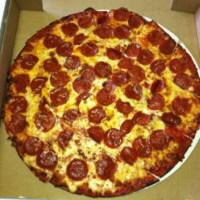

In [18]:
# Resize(size) (size là số)
# Kết quả: Resize theo cạnh ngắn nhất, giữ tỷ lệ gốc
image_resize2 = torchvision.transforms.Resize(200)(image)
print(f'Image original shape:{image.size}')
print(f'Image resize shape:{image_resize2.size}')
image_resize2

Image original shape:(512, 512)
Image resize shape:(200, 200)


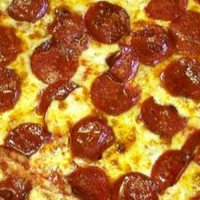

In [19]:
# CenterCrop: dùng để cắt (crop) vùng trung tâm của ảnh với kích thước mong muốn.
# Giữ lại phần trung tâm quan trọng của ảnh.
# Loại bỏ viền ngoài giúp mô hình tập trung vào đối tượng chính.
# Đảm bảo tất cả ảnh đầu vào có cùng kích thước.

image_center_crop = torchvision.transforms.CenterCrop((200, 200))(image)
print(f'Image original shape:{image.size}')
print(f'Image resize shape:{image_center_crop.size}')
image_center_crop

**Nội suy pixcel `torch.transforms.InterpolationMode`**

|Nội suy|	Cách hoạt động|	Ưu điểm|	Nhược điểm|
|-------|---------------|--------|-----------|
|NEAREST| Lấy giá trị pixel gần nhất|	Nhanh, đơn giản|	Ảnh bị răng cưa, mất chi tiết|
|BILINEAR (mặc định)|	Lấy trung bình trọng số của 4 pixel gần nhất	|Mượt hơn NEAREST| Không giữ được độ sắc nét tốt
|BICUBIC|	Lấy trung bình trọng số của 16 pixel gần nhất|	Ảnh mượt hơn, ít mất chi tiết|	Chậm hơn
|LANCZOS|	Sử dụng cửa sổ sinc để lấy mẫu lại pixel|	Giữ chi tiết tốt nhất|	Chậm nhất

Image original shape:(512, 512)
Image resize shape:(224, 224)


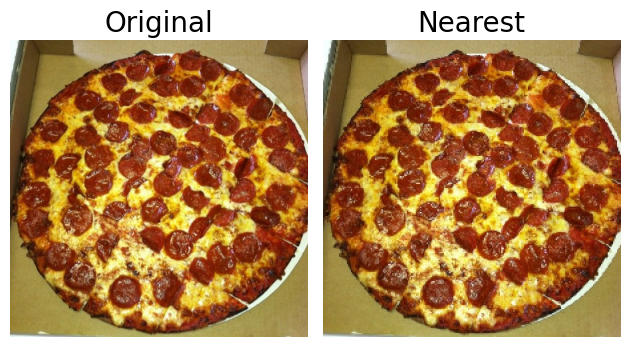

In [20]:
# NEAREST
image_nearest = torchvision.transforms.Resize((224, 224), torchvision.transforms.InterpolationMode.NEAREST)(image)
print(f'Image original shape:{image.size}')
print(f'Image resize shape:{image_nearest.size}')

figs, axs = plt.subplots(1, 2)

axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original', fontsize=20)

axs[1].imshow(image_nearest)
axs[1].axis('off')
axs[1].set_title('Nearest', fontsize=20)

plt.tight_layout()

plt.show()

Image original shape:(512, 512)
Image resize shape:(224, 224)


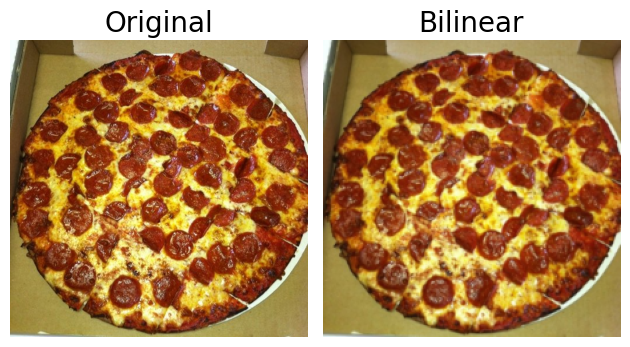

In [21]:
# BILINEAR
image_bilinear = torchvision.transforms.Resize((224, 224), torchvision.transforms.InterpolationMode.BILINEAR)(image)
print(f'Image original shape:{image.size}')
print(f'Image resize shape:{image_bilinear.size}')

figs, axs = plt.subplots(1, 2)

axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original', fontsize=20)

axs[1].imshow(image_bilinear)
axs[1].axis('off')
axs[1].set_title('Bilinear', fontsize=20)

plt.tight_layout()

plt.show()

Image original shape:(512, 512)
Image resize shape:(224, 224)


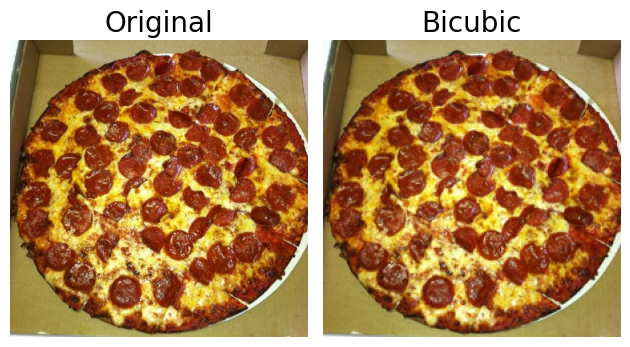

In [22]:
# BICUBIC
image_bicubic = torchvision.transforms.Resize((224, 224), torchvision.transforms.InterpolationMode.BICUBIC)(image)
print(f'Image original shape:{image.size}')
print(f'Image resize shape:{image_bicubic.size}')

figs, axs = plt.subplots(1, 2)

axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original', fontsize=20)

axs[1].imshow(image_bicubic)
axs[1].axis('off')
axs[1].set_title('Bicubic', fontsize=20)

plt.tight_layout()

plt.show()

Image original shape:(512, 512)
Image resize shape:(224, 224)


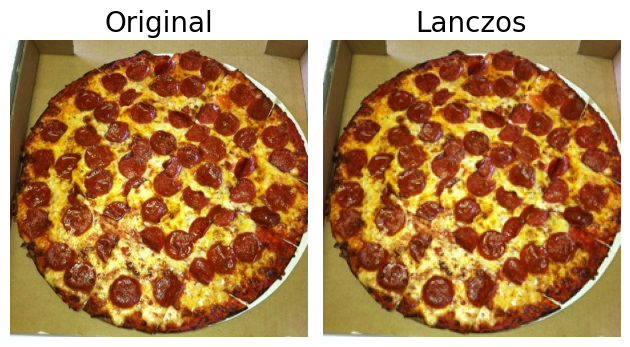

In [23]:
# LANCZOS
image_lanczos = torchvision.transforms.Resize((224, 224), torchvision.transforms.InterpolationMode.LANCZOS)(image)
print(f'Image original shape:{image.size}')
print(f'Image resize shape:{image_lanczos.size}')

figs, axs = plt.subplots(1, 2)

axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original', fontsize=20)

axs[1].imshow(image_lanczos)
axs[1].axis('off')
axs[1].set_title('Lanczos', fontsize=20)

plt.tight_layout()

plt.show()

### **4/ Turn Loaded Images Into DataLoader**

In [24]:
import os
num_cpu = os.cpu_count()
num_cpu

2

In [25]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=num_cpu,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=num_cpu,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a0460a58ad0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a0460c661d0>)

In [26]:
# Check shapes
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### **5/ Loading Image Data with a Custom Dataset**

In [27]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [28]:
class ImageFolderCustom(Dataset):
  def __init__(self, image_paths: List[pathlib.Path], transform: transforms.Compose=None) -> None:
    super().__init__()
    self.image_paths = image_paths
    self.transform = transform
    self.classes = sorted(set(path.parent.name for path in self.image_paths))
    self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    image_path = self.image_paths[index]
    label = self.class_to_idx[image_path.parent.name]  # Lấy tên thư mục làm nhãn

    image = Image.open(image_path).convert("RGB")  # Chuyển về ảnh màu

    if self.transform:
      image = self.transform(image)

    return image, label

  def __repr__(self) -> str:
    return f"ImageFolderCustom(image_paths={self.image_paths}, transform={self.transform})"

  def load_image(self, index: int) -> Image.Image:
    image_path = self.image_paths[index]
    return Image.open(image_path)


In [29]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [30]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [31]:
list(train_dir.glob("*/*.jpg"))[:5]

[PosixPath('data/pizza_steak_sushi/train/sushi/307738.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1214108.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3737197.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/390178.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/17704.jpg')]

In [32]:
train_data_custom = ImageFolderCustom(image_paths=list(train_dir.glob("*/*.jpg")),
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(image_paths=list(test_dir.glob("*/*.jpg")),
                                     transform=test_transforms)
print(train_data_custom, test_data_custom)

ImageFolderCustom(image_paths=[PosixPath('data/pizza_steak_sushi/train/sushi/307738.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/1214108.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/3737197.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/390178.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/17704.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/2813454.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/3353428.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/170385.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/2674024.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/121940.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/14046.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/855721.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/2492146.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/1571146.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/1551817.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/1280119.jpg'), Po

In [33]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [34]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [35]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [36]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [37]:
import random
import matplotlib.pyplot as plt

def display_random_images(dataset: torch.utils.data.Dataset,
                         classes: List[str]=None,
                         n: int=10,
                         random_state=None):
  # Set random seed
  if random_state:
    random.seed(random_state)

  # Get random index samples
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # Setup plot
  plt.figure(figsize=(10, 10))

  for idx, target_sample in enumerate(random_samples_idx):
    image, label = dataset[target_sample][0], dataset[target_sample][1]
    image_permute = image.permute(1, 2, 0)
    # Plot adjusted samples
    plt.subplot(1, n, idx+1)
    plt.imshow(image_permute)
    plt.axis("off")
    if classes:
        title = f"class: {classes[label]}" + f"\nshape: {list(image_permute.shape)}"
    plt.title(title)

  plt.tight_layout()
  plt.show()

In [38]:
train_data.__class__.__name__, train_data_custom.__class__.__name__

('ImageFolder', 'ImageFolderCustom')

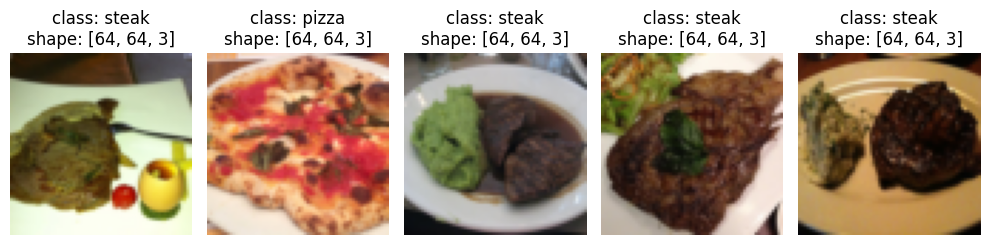

In [39]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      random_state=10)

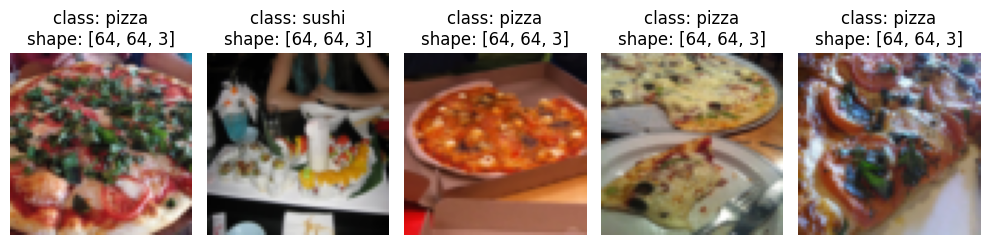

In [40]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      random_state=10) # Try setting the seed for reproducible images

### **6/ Turn Custom Loaded Images Into DataLoader**

In [41]:
from torch.utils.data import DataLoader

num_cpu = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=num_cpu,
                              shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=num_cpu,
                             shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a046092fbd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a045be24e10>)

In [42]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### **More About Data Augmentation**

**Note:** You usually don't perform data augmentation on the test set. The idea of data augmentation is to to artificially increase the diversity of the training set to better predict on the testing set.

However, you do need to make sure your test set images are transformed to tensors. We size the test images to the same size as our training images too, however, inference can be done on different size images if necessary (though this may alter performance).

|Phương pháp|	Cách hoạt động|	Có cần tinh chỉnh tham số?|	Linh hoạt|
|-----------|---------------|---------------------------|----------|
|AutoAugment|	Chọn từ danh sách các policy augmentation có sẵn|	Có|	Cao
|RandAugment|	Chọn phép biến đổi ngẫu nhiên với mức độ cố định|	Có|	Trung bình
|TrivialAugmentWide|	Chọn phép biến đổi ngẫu nhiên với mức độ ngẫu nhiên|	❌ Không|	Cao

In [43]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), #
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

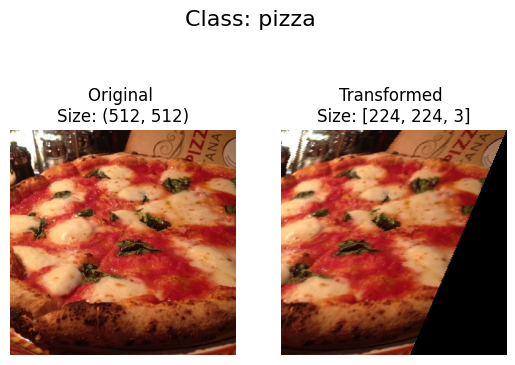

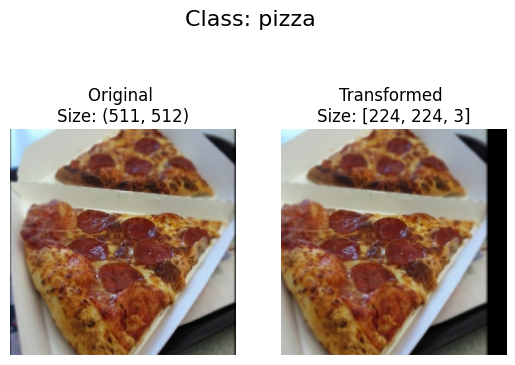

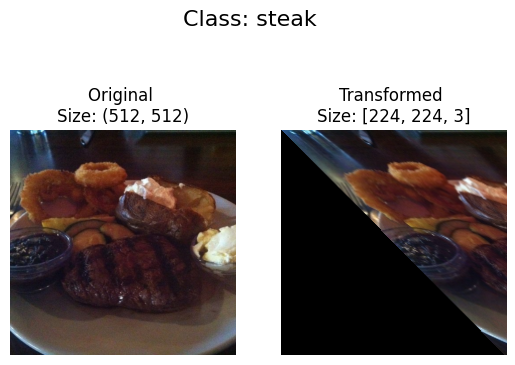

In [44]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

### **7/ Build Model**

In [46]:
import torch
import torch.nn as nn

In [59]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [60]:
device = 'cpu'

torch.manual_seed(42)
model_v0 = TinyVGG(input_shape=3,
                   hidden_units=10,
                   output_shape=len(train_data.classes)).to(device)
model_v0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [61]:
# Test with one sample
img_batch, label_batch = next(iter(train_dataloader))
img_single, label_single = img_batch[0].unsqueeze(dim=0).to(device), label_batch[0].to(device)
print(f"Single image shape: {img_single.shape}\n")

# Make prediction
model_v0.eval()
with torch.inference_mode():
  pred = model_v0(img_single)
  pred_prob = torch.softmax(pred, dim=1)

# Print output
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{pred_prob}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0208, -0.0020,  0.0095]])

Output prediction probabilities:
tensor([[0.3371, 0.3295, 0.3333]])

Output prediction label:
tensor([0])

Actual label:
0


In [62]:
# Use torchinfo to get more infor about model
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary

In [65]:
summary(model_v0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [71]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               criterion: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: str='cpu') -> tuple[float, float]:
  # Put model in mode
  model.train()

  # Setup variable to store metrics
  train_loss, train_acc = 0, 0

  # Loop through data
  for batch, (X, y) in enumerate(dataloader):
    # Send data to device
    X, y = X.to(device), y.to(device)

    # Backprop
    y_pred_logits = model(X)
    loss = criterion(y_pred_logits, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute and accumulate accuracy accross all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred_logits)

  # Adjust metrics
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

TypeError: tuple expected at most 1 argument, got 2

In [72]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              criterion: torch.nn.Module,
              device: str='cpu') -> tuple[float, float]:

  # Put model into mode
  model.eval()

  # Setup variable to store metrics
  test_loss, test_acc = 0, 0

  # Inference mode
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      y_pred_logits = model(X)
      loss = criterion(y_pred_logits, y)
      test_loss += loss.item()

      y_pred_class = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(y_pred_logits)

  # Adjust metrics
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [83]:
from tqdm import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          criterion: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          num_epochs: int = 5,
          device: str = 'cpu') -> dict:

    # Create result variable to store all metrics
    result = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # Loop through epochs
    for epoch in tqdm(range(num_epochs)):
        # Train step
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            criterion=criterion,
            optimizer=optimizer,
            device=device
        )

        # Test step
        test_loss, test_acc = test_step(
            model=model,
            dataloader=test_dataloader,
            criterion=criterion,
            device=device
        )

        # Print out what's happening
        print(
            f"Epoch: [{epoch+1}/{num_epochs}] | "
            f"Train Loss: {train_loss:.4f} | "
            f"Train Acc: {train_acc:.4f} | "
            f"Test Loss: {test_loss:.4f} | "
            f"Test Acc: {test_acc:.4f}"
        )

        # Update results dictionary
        result["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        result["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        result["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        result["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    return result


In [86]:
def plot_loss_acc(results: dict):
  train_loss = results["train_loss"]
  train_acc = results["train_acc"]
  test_loss = results["test_loss"]
  test_acc = results["test_acc"]

  epochs = range(len(train_loss))

  # Plot loss curve
  plt.figure(figsize=(15, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot Accuracy Curve
  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()


##### **7.1/ Model Without Data Augmentation**

In [84]:
import time

# Set up evironment
torch.manual_seed(42)
device = 'cpu'
epochs =10

# Recreate an instance of TinyVGG
model_v0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes))
model_v0.to(device)

# Setup loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_v0.parameters(), lr=0.01)

# Start the timer
start_time = time.time()

# Training
model_v0_result = train(model=model_v0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        criterion=criterion,
                        optimizer=optimizer,
                        num_epochs=epochs,
                        device=device)

# End the timer and print out how long it took
end_time = time.time()
model_v0_result.update({"train_time": end_time-start_time})
print(f"Total training time: {end_time-start_time:.3f} seconds")

 10%|█         | 1/10 [00:03<00:28,  3.19s/it]

Epoch: [1/10] | Train Loss: 1.1121 | Train Acc: 0.2622 | Test Loss: 1.1045 | Test Acc: 0.3333


 20%|██        | 2/10 [00:07<00:30,  3.81s/it]

Epoch: [2/10] | Train Loss: 1.1031 | Train Acc: 0.3244 | Test Loss: 1.1007 | Test Acc: 0.3333


 30%|███       | 3/10 [00:10<00:24,  3.46s/it]

Epoch: [3/10] | Train Loss: 1.1030 | Train Acc: 0.2756 | Test Loss: 1.1094 | Test Acc: 0.3333


 40%|████      | 4/10 [00:13<00:19,  3.32s/it]

Epoch: [4/10] | Train Loss: 1.1058 | Train Acc: 0.3067 | Test Loss: 1.1097 | Test Acc: 0.3333


 50%|█████     | 5/10 [00:16<00:16,  3.25s/it]

Epoch: [5/10] | Train Loss: 1.1039 | Train Acc: 0.3244 | Test Loss: 1.1092 | Test Acc: 0.2533


 60%|██████    | 6/10 [00:20<00:14,  3.57s/it]

Epoch: [6/10] | Train Loss: 1.1032 | Train Acc: 0.2844 | Test Loss: 1.1053 | Test Acc: 0.2533


 70%|███████   | 7/10 [00:23<00:10,  3.42s/it]

Epoch: [7/10] | Train Loss: 1.1017 | Train Acc: 0.3022 | Test Loss: 1.1081 | Test Acc: 0.3333


 80%|████████  | 8/10 [00:27<00:06,  3.32s/it]

Epoch: [8/10] | Train Loss: 1.1034 | Train Acc: 0.3511 | Test Loss: 1.1128 | Test Acc: 0.2533


 90%|█████████ | 9/10 [00:30<00:03,  3.36s/it]

Epoch: [9/10] | Train Loss: 1.1040 | Train Acc: 0.3467 | Test Loss: 1.1025 | Test Acc: 0.3333


100%|██████████| 10/10 [00:34<00:00,  3.45s/it]

Epoch: [10/10] | Train Loss: 1.1050 | Train Acc: 0.3378 | Test Loss: 1.1061 | Test Acc: 0.2533
Total training time: 34.548 seconds


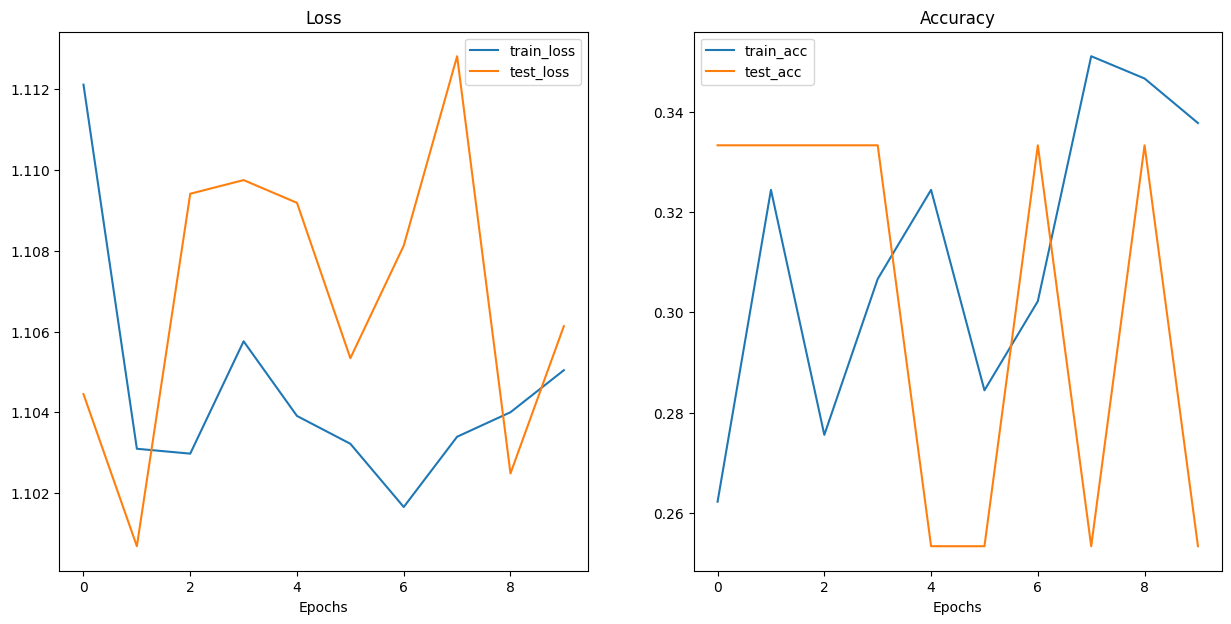

In [87]:
plot_loss_acc(model_v0_result)

**Overfitting và Phương pháp xử lí**

|Phương pháp ngăn chặn overfitting| Mô tả phương pháp|
|---------------------------------|------|
|Thu thập thêm dữ liệu| Có nhiều dữ liệu hơn giúp mô hình có cơ hội học được nhiều mẫu hơn, từ đó mô hình có thể tổng quát hóa tốt hơn cho các dữ liệu mới.|
|Đơn giản hóa mô hình| Nếu mô hình hiện tại đang bị overfitting với dữ liệu huấn luyện, có thể nó đang quá phức tạp. <br> Điều này có nghĩa là mô hình học quá kỹ các mẫu trong tập huấn luyện và không thể tổng quát hóa tốt cho dữ liệu chưa thấy. <br> Một cách để đơn giản hóa mô hình là giảm số lượng lớp hoặc giảm số lượng neuron ẩn trong mỗi lớp.|
|Sử dụng kỹ thuật tăng cường dữ liệu (data augmentation)| Data augmentation giúp thay đổi dữ liệu huấn luyện theo cách làm cho mô hình khó học hơn, đồng thời bổ sung thêm sự đa dạng vào dữ liệu. <br> Nếu mô hình có thể học các mẫu từ dữ liệu đã được tăng cường, nó có thể tổng quát hóa tốt hơn với dữ liệu mới.|
|Sử dụng học chuyển giao (transfer learning)| Học chuyển giao tận dụng các đặc trưng mà một mô hình khác đã học được trước đó (còn gọi là trọng số được tiền huấn luyện) để làm nền tảng cho nhiệm vụ mới. <br> Ví dụ, ta có thể sử dụng một mô hình thị giác máy tính đã được huấn luyện trên một lượng lớn hình ảnh và tinh chỉnh lại để phù hợp hơn với dữ liệu ảnh thực phẩm.|
|Sử dụng các lớp dropout| Dropout là một kỹ thuật ngẫu nhiên loại bỏ các kết nối giữa các lớp ẩn trong mạng nơ-ron. <br> Điều này giúp đơn giản hóa mô hình và làm cho các kết nối còn lại trở nên mạnh mẽ hơn. <br> Ví dụ, có thể sử dụng torch.nn.Dropout() trong PyTorch.|
|Sử dụng giảm tốc độ học (learning rate decay)| Ý tưởng ở đây là giảm dần tốc độ học trong quá trình huấn luyện. <br> Giống như khi bạn cố lấy một đồng xu trong khe ghế, càng gần đến mục tiêu, bạn càng di chuyển chậm hơn để không làm rơi đồng xu. <br> Tương tự, khi mô hình đến gần điểm hội tụ, ta muốn giảm kích thước bước cập nhật trọng số để tránh bị dao động quá nhiều.|
|Dừng sớm (early stopping)| Early stopping giúp dừng quá trình huấn luyện trước khi mô hình bắt đầu bị overfitting. <br> Chẳng hạn, nếu sau 10 epoch liên tiếp mà độ lỗi (loss) không giảm nữa, ta có thể dừng huấn luyện và giữ lại trọng số của mô hình ở thời điểm có độ lỗi thấp nhất.|

**Underfitting và Phương pháp xử lí**

|Phương pháp ngăn chặn underfitting| Mô tả phương pháp|
|----------------------------------|------------------|
|Thêm nhiều lớp hoặc đơn vị ẩn vào mô hình| Nếu mô hình của bạn bị underfitting, có thể nó chưa đủ khả năng để học các mẫu, trọng số và biểu diễn cần thiết để đưa ra dự đoán chính xác. <br> Một cách để tăng khả năng dự đoán là thêm nhiều lớp ẩn hoặc tăng số lượng đơn vị trong các lớp đó.|
|Điều chỉnh tốc độ học (learning rate)| Có thể tốc độ học của mô hình đang quá cao, khiến mô hình cập nhật trọng số quá mức mỗi epoch và không thực sự học được gì. <br> Trong trường hợp này, bạn có thể giảm tốc độ học và quan sát sự thay đổi trong hiệu suất mô hình|
|Sử dụng học chuyển giao (transfer learning)| Học chuyển giao không chỉ giúp ngăn chặn overfitting mà còn có thể khắc phục underfitting. <br> Bằng cách sử dụng các đặc trưng từ một mô hình đã được huấn luyện trước đó, bạn có thể tinh chỉnh chúng để phù hợp hơn với bài toán của mình.|
|Huấn luyện trong thời gian dài hơn| Đôi khi, mô hình chỉ cần nhiều thời gian hơn để học các biểu diễn của dữ liệu. <br> Nếu bạn nhận thấy trong các thử nghiệm ban đầu rằng mô hình chưa học được gì đáng kể, có thể việc huấn luyện thêm nhiều epoch sẽ giúp cải thiện hiệu suất.|
|Giảm mức độ regularization| Có thể mô hình đang bị underfitting vì bạn đang cố gắng ngăn chặn overfitting quá mức. <br> Nếu sử dụng quá nhiều kỹ thuật regularization như dropout hoặc weight decay, mô hình có thể bị hạn chế quá nhiều và không học được các mẫu quan trọng. <br> Hãy thử giảm bớt regularization để xem liệu mô hình có khớp với dữ liệu tốt hơn không.|

> Không có phương pháp nào là **chìa khóa vạn năng** để ngăn chặn overfitting và underfitting. Đây vẫn là một trong những lĩnh vực nghiên cứu sôi động nhất trong machine learning.

> Mục tiêu là **tìm ra sự cân bằng**: mô hình phải đủ phức tạp để học được dữ liệu (tránh underfitting) nhưng không quá phức tạp đến mức mất khả năng tổng quát hóa (tránh overfitting). Thực tế, hai vấn đề này có thể tác động lẫn nhau—quá nhiều điều chỉnh để tránh overfitting có thể dẫn đến underfitting và ngược lại.

> Một trong những phương pháp mạnh mẽ nhất để giải quyết cả hai vấn đề này là **transfer learning**. Thay vì thiết kế từ đầu các kỹ thuật giảm overfitting và underfitting, bạn có thể tận dụng một mô hình đã được huấn luyện tốt trong lĩnh vực tương tự và điều chỉnh nó cho bài toán của mình. Điều này giúp tiết kiệm thời gian và thường mang lại kết quả tốt hơn so với huấn luyện từ đầu.

##### **7.2/ Model With Data Augmentation**

In [88]:
# Create transform for train set
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # Trivial Data Augmentation
    transforms.ToTensor()
])

# Create transform for test set
# No need to augment test set, just resize and make sure it in the same dtype with train set
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [92]:
# Turn image folders into Datasets
train_data_transform = datasets.ImageFolder(train_dir, transform=train_transform)
test_data_transform = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_transform, test_data_transform

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [95]:
# Turn Datasets into DataLoader
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_transform = DataLoader(dataset=train_data_transform,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_transform = DataLoader(dataset=test_data_transform,
                                      batch_size=BATCH_SIZE,
                                      shuffle=False,
                                      num_workers=NUM_WORKERS)

train_dataloader_transform, test_dataloader_transform

(<torch.utils.data.dataloader.DataLoader at 0x7a044e993210>,
 <torch.utils.data.dataloader.DataLoader at 0x7a0459619450>)

In [100]:
#### Traninng
import time

# Reconstruct model
device = 'cpu'
model_v1 = TinyVGG(input_shape=3,
                   hidden_units=10,
                   output_shape=len(train_data_transform.classes))
model_v1.to(device)

# Set up evironment
torch.manual_seed(42)
epochs =10

# Setup loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_v1.parameters(), lr=0.01)

# Start the timer
start_time = time.time()

# Training
model_v1_result = train(model=model_v0,
                        train_dataloader=train_dataloader_transform,
                        test_dataloader=test_dataloader_transform,
                        criterion=criterion,
                        optimizer=optimizer,
                        num_epochs=epochs,
                        device=device)

# End the timer and print out how long it took
end_time = time.time()
model_v1_result.update({"train_time": end_time-start_time})
print(f"Total training time: {end_time-start_time:.3f} seconds")

 10%|█         | 1/10 [00:02<00:23,  2.67s/it]

Epoch: [1/10] | Train Loss: 1.0946 | Train Acc: 0.4258 | Test Loss: 1.1087 | Test Acc: 0.2604


 20%|██        | 2/10 [00:05<00:20,  2.51s/it]

Epoch: [2/10] | Train Loss: 1.0946 | Train Acc: 0.4258 | Test Loss: 1.1087 | Test Acc: 0.2604


 30%|███       | 3/10 [00:07<00:15,  2.26s/it]

Epoch: [3/10] | Train Loss: 1.0946 | Train Acc: 0.4258 | Test Loss: 1.1087 | Test Acc: 0.2604


 40%|████      | 4/10 [00:09<00:13,  2.17s/it]

Epoch: [4/10] | Train Loss: 1.0977 | Train Acc: 0.3047 | Test Loss: 1.1087 | Test Acc: 0.2604


 50%|█████     | 5/10 [00:11<00:10,  2.10s/it]

Epoch: [5/10] | Train Loss: 1.0946 | Train Acc: 0.4258 | Test Loss: 1.1087 | Test Acc: 0.2604


 60%|██████    | 6/10 [00:12<00:08,  2.04s/it]

Epoch: [6/10] | Train Loss: 1.0977 | Train Acc: 0.3047 | Test Loss: 1.1087 | Test Acc: 0.2604


 70%|███████   | 7/10 [00:15<00:06,  2.22s/it]

Epoch: [7/10] | Train Loss: 1.0977 | Train Acc: 0.3047 | Test Loss: 1.1087 | Test Acc: 0.2604


 80%|████████  | 8/10 [00:18<00:04,  2.30s/it]

Epoch: [8/10] | Train Loss: 1.0946 | Train Acc: 0.4258 | Test Loss: 1.1087 | Test Acc: 0.2604


 90%|█████████ | 9/10 [00:19<00:02,  2.19s/it]

Epoch: [9/10] | Train Loss: 1.1023 | Train Acc: 0.3047 | Test Loss: 1.1087 | Test Acc: 0.2604


100%|██████████| 10/10 [00:21<00:00,  2.19s/it]

Epoch: [10/10] | Train Loss: 1.0946 | Train Acc: 0.4258 | Test Loss: 1.1087 | Test Acc: 0.2604
Total training time: 21.950 seconds


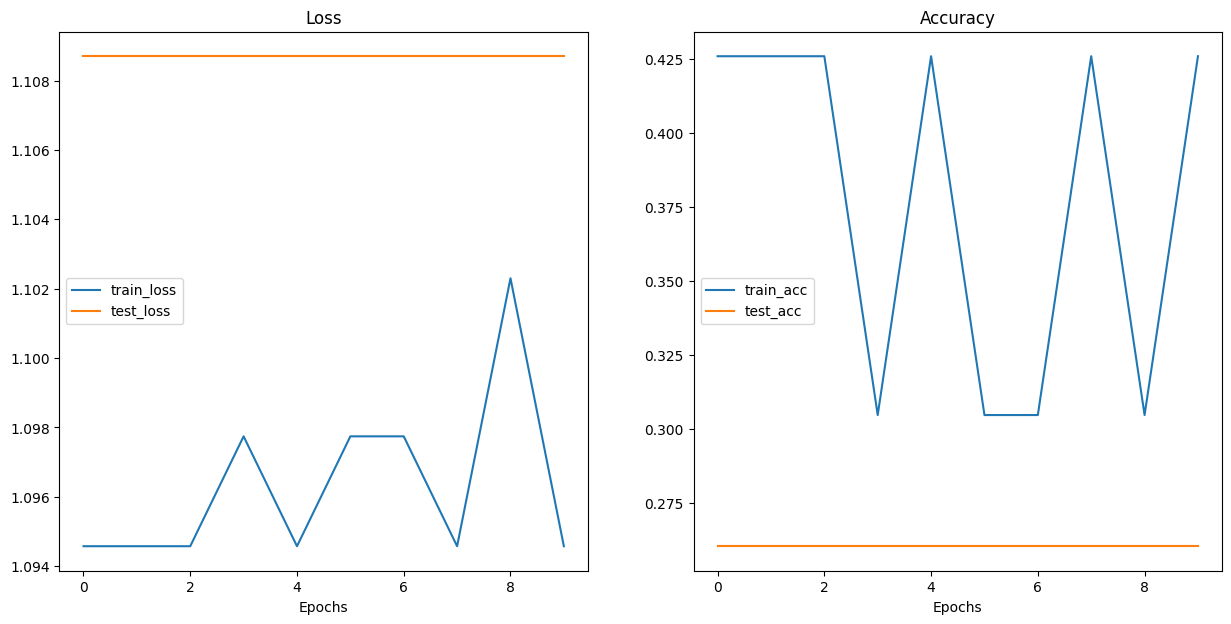

In [101]:
plot_loss_acc(model_v1_result)

### **8/ Make Prediction With Custom Dataset**

In [103]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [110]:
from PIL import Image

custom_image = Image.open(custom_image_path)
custom_image

Output hidden; open in https://colab.research.google.com to view.

In [120]:
# Check image info
print(f"Image height: {custom_image.height}")
print(f"Image width: {custom_image.width}")
print(f"Custom image path: {custom_image_path}")

# Turn data into numpy array
custom_image_array = np.array(custom_image)
print(f'Image shape:{custom_image_array.shape}')
print(custom_image_array)

Image height: 4032
Image width: 3024
Custom image path: data/04-pizza-dad.jpeg
Image shape:(4032, 3024, 3)
[[[154 171 119]
  [173 190 138]
  [181 193 147]
  ...
  [ 21  22  17]
  [ 18  19  14]
  [ 14  15  10]]

 [[146 163 111]
  [165 182 130]
  [181 193 145]
  ...
  [ 21  22  17]
  [ 18  19  14]
  [ 15  16  11]]

 [[124 141  87]
  [146 163 111]
  [172 184 136]
  ...
  [ 18  19  14]
  [ 17  18  13]
  [ 15  16  11]]

 ...

 [[ 72  55  35]
  [ 59  42  22]
  [ 45  28   8]
  ...
  [152 107  52]
  [150 104  52]
  [148 103  48]]

 [[ 64  47  27]
  [ 55  38  18]
  [ 41  24   4]
  ...
  [150 108  50]
  [147 104  49]
  [144 102  44]]

 [[ 64  47  27]
  [ 60  43  23]
  [ 46  29   9]
  ...
  [149 107  49]
  [146 104  46]
  [143 101  43]]]


In [125]:
# Permute image from [HWC] -> [CHW]
custom_image_permute = custom_image_array.transpose(2, 0, 1)

# Change the data type to float32
custom_image_permute = custom_image_permute.astype(np.float32)

# Scale image to get them between [0, 1]
custom_image_permute /= 255.0

# Convert the NumPy array to a PyTorch tensor
custom_image_tensor = torch.from_numpy(custom_image_permute).to(device)

# Print out image data
print(f"Custom image tensor:\n{custom_image_tensor}\n")
print(f"Custom image shape: {custom_image_tensor.shape}\n")
print(f"Custom image dtype: {custom_image_tensor.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

In [126]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image_tensor)

# Print out original shape and new shape
print(f"Original shape: {custom_image_tensor.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [127]:
model_v1.eval()
with torch.inference_mode():

    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_v1(custom_image_transformed.unsqueeze(dim=0).to(device))

# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])
Prediction logits: tensor([[-0.0576,  0.0175, -0.0154]])
Prediction probabilities: tensor([[0.3204, 0.3454, 0.3342]])
Prediction label: tensor([1])


In [128]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'steak'

**<h1>WRONGGGGGGGGGGGGGGGGGGGG!</h1>**